# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [77]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [78]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [79]:
# Display the class names and save them for later
import csv

classes_dict = {}
with open('signnames.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if row[0].isdigit():
            classes_dict[int(row[0])] = row[1]
            print(row[0], row[1])

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

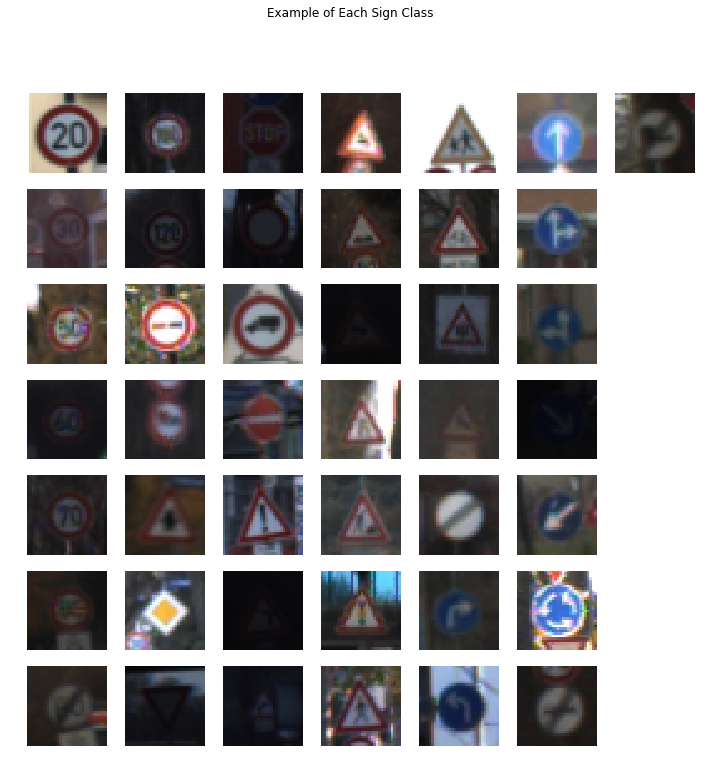

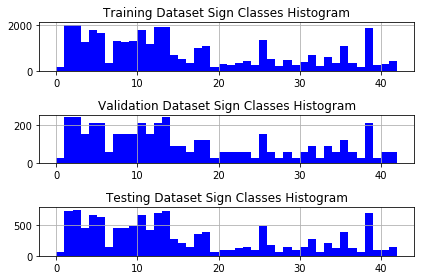

In [80]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure()
# Show one of each class of sign
x = 0
y = 0
f, axarr = plt.subplots(7, 7, figsize=(12,12))
for label in range(0, 49):
    axarr[x, y].axis('off')
    if label < n_classes:
        index = np.argwhere(y_train==label)[0]
        axarr[x, y].imshow(X_train[index].squeeze())
    x = (x + 1) % 7
    if x == 0: y += 1
plt.suptitle("Example of Each Sign Class")
        
plt.figure()
# Show that train, valid, and test datasets all have similar distributions
plt.subplot(3, 1, 1)
n, bins, patches = plt.hist(y_train, 42, facecolor='blue')
plt.grid(True)
plt.title('Training Dataset Sign Classes Histogram')

plt.subplot(3, 1, 2)
n, bins, patches = plt.hist(y_valid, 42, facecolor='blue')
plt.grid(True)
plt.title('Validation Dataset Sign Classes Histogram')

plt.subplot(3, 1, 3)
n, bins, patches = plt.hist(y_test, 42, facecolor='blue')
plt.grid(True)
plt.title('Testing Dataset Sign Classes Histogram')
plt.tight_layout()
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [81]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from skimage.color import rgb2gray
import cv2
    
def normalize(images):
    # Convert to black and white. Equalize image histogram to improve contrast.
    images_norm = np.array([cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)) for image in images])
    images_norm_axis = images_norm[..., np.newaxis]     # add 1 channel for tf
    return images_norm_axis - np.mean(images_norm_axis) # zero mean

X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm = normalize(X_test)

### Dataset Transformations

In [82]:
# skimage ended up being much slower than OpenCV
# OpenCV2 docs were heaviled relayed on for these functions
import cv2
import scipy.ndimage
from skimage import transform

def gaussian_blur(img):
    kernel = random.choice([(3,3), (5,5)])
    return cv2.GaussianBlur(img, kernel, 0)

def shear(img):
    row, col = img.shape[:2]

    shear = random.randint(5,15)
    pts1 = np.array([[5, 5], [20, 5], [5, 20]]).astype('float32')
    pt1 = 5 + shear * np.random.uniform() - shear / 2
    pt2 = 20 + shear * np.random.uniform() - shear / 2
    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])

    matrix = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(img, matrix, (col, row))

def shift(img):
    row, col = img.shape[:2]

    row_dist = random.uniform(-0.2 * row, 0.2 * row)
    col_dist = random.uniform(-0.2 * col, 0.2 * col)
    matrix = np.float32([[1, 0, row_dist], [0, 1, col_dist]])
    return cv2.warpAffine(img, matrix, (row, col))

def rotate(img):
    row, col = img.shape[:2]
    
    deg = random.randint(-20, 20)
    matrix = cv2.getRotationMatrix2D((row / 2, col / 2), deg, 1)
    return cv2.warpAffine(img, matrix, (col, row))

def gamma(img):
    img = img / 255.0
    img = cv2.pow(img, random.uniform(0.75, 2))
    return np.uint8(img * 255)

def random_effects(image, effects=[]):
    if len(effects) != 5:
        effects = [random.randint(0, 1) for x in range(5)]

    if effects[0]:
        image = shear(image)
    if effects[1]:
        image = shift(image)
    if effects[2]:
        image = rotate(image)
    if effects[3]:
        image = gaussian_blur(image)
    if effects[4]:
        image = gamma(image)
    
    if image.shape == (32, 32):
        return image[..., np.newaxis]
    else:
        return image

(32, 32, 3)  ->  (32, 32, 1)


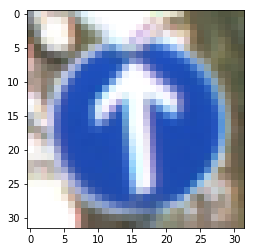

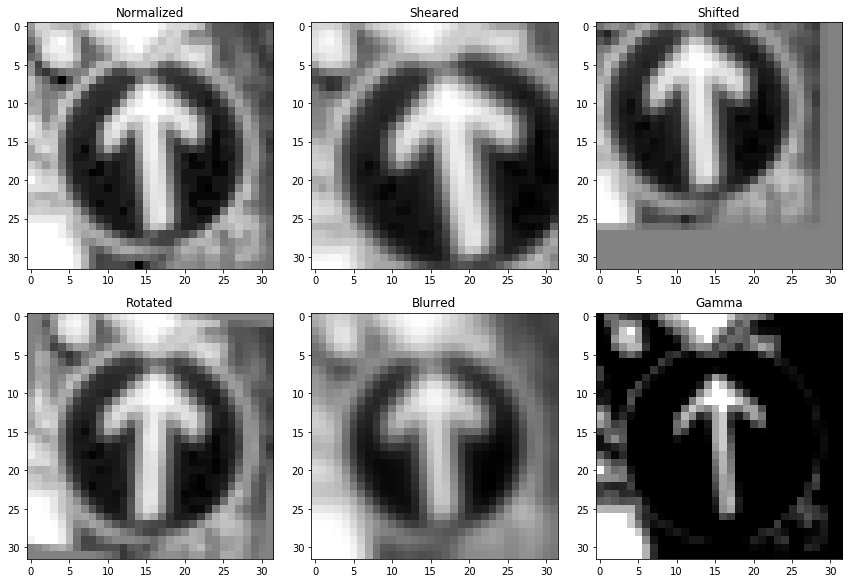

In [83]:
example = np.copy(X_train_norm[20000])
plt.figure()
plt.imshow(X_train[20000].squeeze(), cmap='gray')
fig = plt.figure(figsize=(12,12))
plt.subplot(3, 3, 1)
plt.imshow(example.squeeze(), cmap='gray')
plt.title("Normalized")
plt.subplot(3, 3, 2)
plt.imshow(shear(example).squeeze(), cmap='gray')
plt.title("Sheared")
plt.subplot(3, 3, 3)
plt.imshow(shift(example).squeeze(), cmap='gray')
plt.title("Shifted")
plt.subplot(3, 3, 4)
plt.imshow(rotate(example).squeeze(), cmap='gray')
plt.title("Rotated")
plt.subplot(3, 3, 5)
plt.imshow(gaussian_blur(example).squeeze(), cmap='gray')
plt.title("Blurred")
plt.subplot(3, 3, 6)
plt.imshow(gamma(example).squeeze(), cmap='gray')
plt.title("Gamma")
fig.tight_layout()

print(X_train.shape[1:], " -> ", X_train_norm.shape[1:])

### Additional Images

In [84]:
import time

MIN_EXAMPLES = 3000

X_train_generated = X_train_norm
y_train_generated = y_train

classes = list(y_train_generated)
per_class = {i:classes.count(i) for i in range(43)}

new_images = []
new_classes = []

# Generated new images with random effects so each class has at least 3000 images
for current_class, count in per_class.items():
    min_loops = int(np.ceil(MIN_EXAMPLES / count)) - 1
    
    print("{}: {} images. Performing {} loops ".format(current_class, count, min_loops), end='')
    num_added = 0
    start = time.process_time()
    for run in range(min_loops):
        for train_img, img_class in zip(X_train_norm, y_train):
            if img_class == current_class:
                new_images.append(random_effects(train_img))
                new_classes.append(img_class)
                num_added += 1
        print('.', end='')
    duration = time.process_time() - start
    print("\n{} images added in {} seconds.\n".format(num_added, duration))

X_train_generated = np.append(X_train_generated, new_images, axis=0)
y_train_generated = np.append(y_train_generated, new_classes, axis=0)

0: 180 images. Performing 16 loops ................
2880 images added in 1.4214031989999967 seconds.

1: 1980 images. Performing 1 loops .
1980 images added in 0.2618931909996718 seconds.

2: 2010 images. Performing 1 loops .
2010 images added in 0.2603940630001489 seconds.

3: 1260 images. Performing 2 loops ..
2520 images added in 0.37778033299991876 seconds.

4: 1770 images. Performing 1 loops .
1770 images added in 0.23718713600010233 seconds.

5: 1650 images. Performing 1 loops .
1650 images added in 0.22370751799962818 seconds.

6: 360 images. Performing 8 loops ........
2880 images added in 0.834377429000142 seconds.

7: 1290 images. Performing 2 loops ..
2580 images added in 0.39079380499970284 seconds.

8: 1260 images. Performing 2 loops ..
2520 images added in 0.387107928000205 seconds.

9: 1320 images. Performing 2 loops ..
2640 images added in 0.3917575499999657 seconds.

10: 1800 images. Performing 1 loops .
1800 images added in 0.24328737899986663 seconds.

11: 1170 image

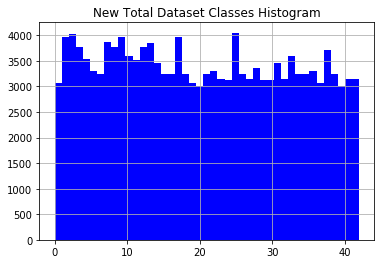

In [85]:
plt.figure()
n, bins, patches = plt.hist(y_train_generated, 43, facecolor='blue')
plt.grid(True)
plt.title('New Total Dataset Classes Histogram')

### TensorFlow Setup

In [86]:
# List devices found by tf
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

for device in devices:
    if device.device_type == 'GPU':
        print(device.physical_device_desc)
    else:
        print(device.name[1:])

cpu:0
device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:02:00.0
device: 1, name: GeForce GTX 770, pci bus id: 0000:01:00.0
device: 2, name: GeForce GTX 1060 3GB, pci bus id: 0000:03:00.0


### Model Architecture

In [87]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

weights = {
    'c1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma)),
    'c3': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma)),
    'f5': tf.Variable(tf.truncated_normal([400, 512], mean=mu, stddev=sigma)),
    'f6': tf.Variable(tf.truncated_normal([512, 84], mean=mu, stddev=sigma)),
    'f7': tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
}
bias = {
    'c1': tf.Variable(tf.zeros(6)),
    'c3': tf.Variable(tf.zeros(16)),
    'f5': tf.Variable(tf.zeros(512)),
    'f6': tf.Variable(tf.zeros(84)),
    'f7': tf.Variable(tf.zeros(43))
}

keep_prob = tf.placeholder(tf.float32)
def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    # Layer 1: Convolutional. Input = 32x32x1 Output = 28x28x6.
    c1 = tf.nn.conv2d(x, weights['c1'], strides=[1, 1, 1, 1], padding='VALID') + bias['c1']
    c1 = tf.nn.relu(c1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    s2 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    c3 = tf.nn.conv2d(s2, weights['c3'], strides=[1, 1, 1, 1], padding='VALID') + bias['c3']
    c3 = tf.nn.relu(c3)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    s4 = tf.nn.max_pool(c3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(s4)
    
    # Drop out.
    dropped = tf.nn.dropout(flat, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 512.
    f5 = tf.matmul(dropped, weights['f5']) + bias['f5']
    f5 = tf.nn.relu(f5)

    # Layer 4: Fully Connected. Input = 512. Output = 84.
    f6 = tf.matmul(f5, weights['f6']) + bias['f6']
    f6 = tf.nn.relu(f6)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    f7 = tf.matmul(f6, weights['f7']) + bias['f7']
    logits = tf.nn.relu(f7)
    
    return logits

In [88]:
EPOCHS = 15
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [91]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import time

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())
num_examples = len(X_train_generated)

print("Training with {} examples...".format(num_examples))
print()
for i in range(EPOCHS):
    start = time.process_time()
    X_train_generated, y_train_generated = shuffle(X_train_generated, y_train_generated)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train_generated[offset:end], y_train_generated[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})

    validation_accuracy = evaluate(sess, X_valid_norm, y_valid)
    duration = time.process_time() - start
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Training Time = {:.3f}s".format(duration))
    print()
        
saver.save(sess, './lenet')
print("Model saved")

Training with 146574 examples...

EPOCH 1 ...
Validation Accuracy = 0.565
Training Time = 9.153s

EPOCH 2 ...
Validation Accuracy = 0.767
Training Time = 9.201s

EPOCH 3 ...
Validation Accuracy = 0.866
Training Time = 9.148s

EPOCH 4 ...
Validation Accuracy = 0.892
Training Time = 9.123s

EPOCH 5 ...
Validation Accuracy = 0.922
Training Time = 9.205s

EPOCH 6 ...
Validation Accuracy = 0.937
Training Time = 9.326s

EPOCH 7 ...
Validation Accuracy = 0.938
Training Time = 9.306s

EPOCH 8 ...
Validation Accuracy = 0.938
Training Time = 9.223s

EPOCH 9 ...
Validation Accuracy = 0.944
Training Time = 9.376s

EPOCH 10 ...
Validation Accuracy = 0.950
Training Time = 9.155s

EPOCH 11 ...
Validation Accuracy = 0.949
Training Time = 9.252s

EPOCH 12 ...
Validation Accuracy = 0.952
Training Time = 9.223s

EPOCH 13 ...
Validation Accuracy = 0.950
Training Time = 9.247s

EPOCH 14 ...
Validation Accuracy = 0.948
Training Time = 9.256s

EPOCH 15 ...
Validation Accuracy = 0.959
Training Time = 9.169s



### Test Dataset

In [93]:
evaluate(sess, X_test_norm, y_test)

0.93127474244964192

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

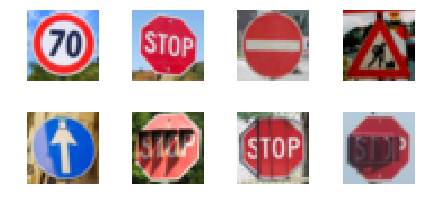

In [94]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

img_4 = mpimg.imread('web/tsweb_4.bmp')
img_14 = mpimg.imread('web/tsweb_14.bmp')
img_17 = mpimg.imread('web/tsweb_17.bmp')
img_25 = mpimg.imread('web/tsweb_25.bmp')
img_35 = mpimg.imread('web/tsweb_35.bmp')
blinders1 = mpimg.imread('web/stop_blinders1.bmp')
blinders2 = mpimg.imread('web/stop_blinders2.bmp')
blinders3 = mpimg.imread('web/stop_blinders3.bmp')
web = [img_4, img_14, img_17, img_25, img_35, blinders1, blinders2, blinders3]

fig = plt.figure(figsize=(6,3))
for i, image in enumerate(web):
    plt.subplot(2, 4, i+1).axis('off')
    plt.imshow(image)
fig.tight_layout()

X_web = normalize(web)
y_web = np.array([4, 14, 17, 25, 35, 14, 14, 14])

### Predict the Sign Type for Each Image

In [95]:
print("Web Logits:", sess.run(tf.argmax(logits, 1), feed_dict={x: X_web, y: y_web, keep_prob: 1.0}))
print("Web Actual:", sess.run(tf.argmax(one_hot_y, 1), feed_dict={x: X_web, y: y_web, keep_prob: 1.0}))

Web Logits: [ 4 14 17 25 35 39 14  5]
Web Actual: [ 4 14 17 25 35 14 14 14]


### Analyze Performance

In [96]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy:", sess.run(accuracy_operation, feed_dict={x: X_web, y: y_web, keep_prob: 1.0}) * 100)

Accuracy: 75.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

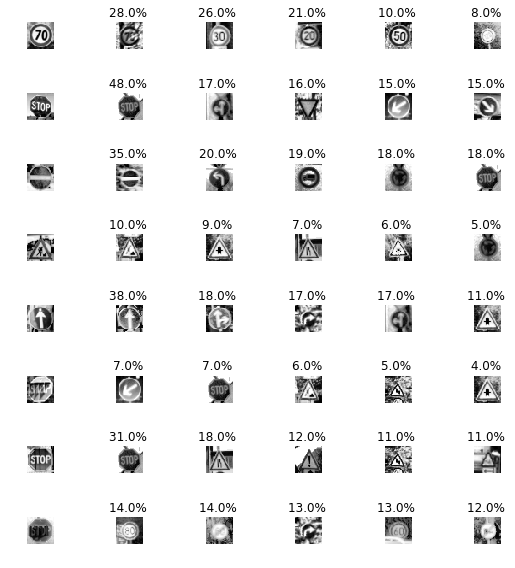

In [115]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
output_logits = sess.run(logits, feed_dict={x: X_web, y: y_web, keep_prob: 1.0})
top_k, k_classes = sess.run(tf.nn.top_k(output_logits, k=5))
top_k, k_classes

fig = plt.figure(figsize=(8,8))
sindex = 1
for i, image in enumerate(X_web):
    plt.subplot(8, 6, sindex).axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    for j, k_class in enumerate(k_classes[i]):
        sindex += 1
        example_index = np.argwhere(y_test==k_class)[0]
        plt.subplot(8, 6, sindex).axis('off')
        plt.imshow(X_test_norm[example_index].squeeze(), cmap='gray')
        plt.title("{}% {}".format(round(top_k[i][j]), ""))
    sindex += 1
    fig.tight_layout()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [50]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")